# Диплом

1. Победа над чудовищем (Одоление монстра)
2. Из грязи - в князи
3. Путешествие и возвращение домой
4. Приключение (Квест)
5. Возрождение (Воскресение)
6. Комедия
7. Трагедия

https://kulturolog-ia.livejournal.com/556214.html

https://shichengaru.livejournal.com/818556.html

https://dzen.ru/a/YN7BD5--mhoEfbbG

In [1]:
import pandas as pd
import numpy as np
import wget
import warnings
import ebooklib
import os
import seaborn as sns
import nltk
import string
import pymorphy2
import re
import spacy
import datetime
import sys
import codecs
import tokenization
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as trchv_transforms
import gensim
import plotly.graph_objects as go

from sklearn.feature_extraction.text import TfidfVectorizer # TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
# from russiannames import 
# from PyPeopleNames import PyPeopleNames

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, accuracy_score
from gensim.models import Word2Vec, FastText
from transformers import get_linear_schedule_with_warmup
from transformers import BertForSequenceClassification
from transformers import BertTokenizer
from sklearn.metrics import precision_recall_fscore_support
from transformers import AdamW
from sklearn.decomposition import PCA
from torch.utils.data import DataLoader
from keras_bert import load_trained_model_from_checkpoint
from pymystem3 import Mystem
from tqdm import tqdm # progress_apply istead apply
from ebooklib import epub
from epub2txt import epub2txt
from bs4 import BeautifulSoup
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.tree import Tree
from sklearn.model_selection import train_test_split
from bert_dataset import CustomDataset
from bert_classifier import BertClassifier
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

# from russian_names import RussianNames


In [2]:
tqdm.pandas()

In [3]:
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# from IPython.display import HTML
# display(HTML("<style>.container { width:70% !important; }</style>"))

!!! Главы не теряются !!!

https://habr.com/ru/post/517410/

https://habr.com/ru/company/otus/blog/705482/

https://habr.com/ru/company/otus/blog/687796/

## Формируем датасет книг и тегов

https://medium.com/@zazazakaria18/turn-your-ebook-to-text-with-python-in-seconds-2a1e42804913

### *.epub книги в pandas dataframe

In [4]:
# def epub2html(epub_path):
    
#     book = epub.read_epub(epub_path)
#     chapters = []
    
#     for item in book.get_items():
#         if item.get_type() == ebooklib.ITEM_DOCUMENT:
#             chapters.append(item.get_content())
            
#     return chapters

In [5]:
# blacklist = ['[document]', 'noscript', 'header', 'html', 'meta', 'head', 'input', 'script', 'style']

In [6]:
# def chap2text(chap):
    
#     output = ''
#     soup = BeautifulSoup(chap, 'html.parser')
#     text = soup.find_all(text=True)
    
#     for t in text:
#         if t.parent.name not in blacklist:
#             output += '{} '.format(t)
            
#     return output

In [7]:
# def html2text(thtml):
    
#     output = []
    
#     for html in thtml:
#         text = chap2text(html)
#         output.append(text)
        
#     return output

In [8]:
# def epub2text(epub_path):
#     chapters = epub2html(epub_path)
#     text = html2text(chapters)
#     return text

In [9]:
# идём по всем книгам, преобразовываем из epub в str, формируем датасет

data = pd.DataFrame(columns=['Title', 'Text'])

directory = 'books'

index = 0

for filename in os.listdir(directory):
    
    epub_path = os.path.join(directory, filename)
    
    if os.path.isfile(epub_path):
        book_title = filename
        book_text = epub2txt(epub_path)
        data.loc[index] = [book_title, book_text]
    
    index += 1

[W 230204 13:07:13 epub2txt:98]  toc_uids exc: 'Section' object has no attribute 'uid'
[W 230204 13:07:13 epub2txt:98]  toc_uids exc: 'Section' object has no attribute 'uid'
[W 230204 13:07:13 epub2txt:98]  toc_uids exc: 'Section' object has no attribute 'uid'
[W 230204 13:07:14 epub2txt:98]  toc_uids exc: 'Section' object has no attribute 'uid'
[W 230204 13:07:14 epub2txt:98]  toc_uids exc: 'Section' object has no attribute 'uid'
[W 230204 13:07:14 epub2txt:98]  toc_uids exc: 'Section' object has no attribute 'uid'
[W 230204 13:07:14 epub2txt:98]  toc_uids exc: 'Section' object has no attribute 'uid'
[W 230204 13:07:14 epub2txt:98]  toc_uids exc: 'Section' object has no attribute 'uid'
[W 230204 13:07:14 epub2txt:98]  toc_uids exc: 'Section' object has no attribute 'uid'
[W 230204 13:07:14 epub2txt:98]  toc_uids exc: 'Section' object has no attribute 'uid'
[W 230204 13:07:14 epub2txt:98]  toc_uids exc: 'Section' object has no attribute 'uid'
[W 230204 13:07:14 epub2txt:98]  toc_uids e

In [10]:
data.head(2)

,Title,Text
0,Анна Каренина.epub,\nЛев Толстой\nАнна Каренина\nРоман «Широкого ...
1,Аэлита.epub,\nСтранное объявление\nНа улице Красных Зорь п...


### Добавляем тэги

In [11]:
data_tags = pd.read_csv('tags/tags.txt', names=['Title', 'Tag'], dtype = {'Title': str, 'Tag': str})

In [12]:
data_tags.head(2)

,Title,Tag
0,Гарри Поттер и Филосовский камень.epub,1
1,Гарри Поттер и Тайная Комната.epub,1


In [13]:
data = data.merge(data_tags, on='Title')
data.head()

,Title,Text,Tag
0,Анна Каренина.epub,\nЛев Толстой\nАнна Каренина\nРоман «Широкого ...,7
1,Аэлита.epub,\nСтранное объявление\nНа улице Красных Зорь п...,3
2,Белый пароход.epub,\nЧингиз Айтматов\nБелый пароход\n(ПОСЛЕ СКАЗК...,7
3,Беовульф.epub,Андрей Мартьянов\nБеовульф\nАвтор искренне бла...,1
4,Большие надежды.epub,\nЧарльз Диккенс\nБОЛЬШИЕ НАДЕЖДЫ\nГлава I\nФа...,2


<AxesSubplot:xlabel='Tag', ylabel='count'>

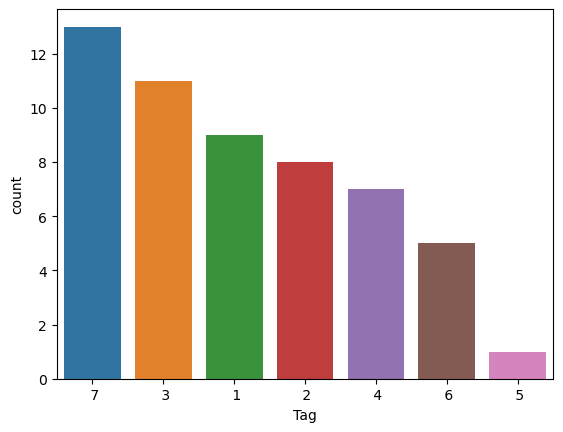

In [14]:
sns.countplot(data=data, x="Tag")

## Предварительная обработка (препроцессинг) текста

### Очищаем текста от цифр и символов

In [15]:
# def remove_chars_from_text(text, chars):
#     return ''.join([ch for ch in text if ch not in chars])

In [16]:
data['Text'] = data.apply(lambda x: re.sub("[^а-яА-Я]"," ", str(x.Text)), axis=1)

In [17]:
data.head()

,Title,Text,Tag
0,Анна Каренина.epub,Лев Толстой Анна Каренина Роман Широкого дых...,7
1,Аэлита.epub,Странное объявление На улице Красных Зорь поя...,3
2,Белый пароход.epub,Чингиз Айтматов Белый пароход ПОСЛЕ СКАЗКИ ...,7
3,Беовульф.epub,Андрей Мартьянов Беовульф Автор искренне благо...,1
4,Большие надежды.epub,Чарльз Диккенс БОЛЬШИЕ НАДЕЖДЫ Глава Фамили...,2


### Получение списка с предполагаемыми именами

In [18]:
# text = data['Text'].loc[0]
# entities = []

# nltk_results = ne_chunk(pos_tag(word_tokenize(text)))
# for nltk_result in nltk_results:
#     if type(nltk_result) == Tree:
#         name = ''
#         for nltk_result_leaf in nltk_result.leaves():
#             name += nltk_result_leaf[0] + ' '
#             entities.append(name)

In [19]:
# def extract_entities(text):    
#     entities = []
    
#     for sent in nltk.sent_tokenize(text):
#        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
#             if hasattr(chunk, 'label'):
# #                 print (chunk.node, ' '.join(c[0] for c in chunk.leaves()))
#                 entities.append(' '.join(c[0] for c in chunk.leaves()))
                
#     return entities

In [20]:
# entities_temp = extract_entities(data['Text'].loc[0])

In [21]:
# entities = []

# for item in entities_temp:
#     entities.append(item.lower())

In [22]:
# entities = np.unique(entities)
# entities

### Приводим к нижнему регистру все тексты

In [23]:
# приводим к нижнему регистру все тексты
data['Text'] = data.apply(lambda x: str(x.Text).lower(), axis=1)

In [24]:
data.head()

,Title,Text,Tag
0,Анна Каренина.epub,лев толстой анна каренина роман широкого дых...,7
1,Аэлита.epub,странное объявление на улице красных зорь поя...,3
2,Белый пароход.epub,чингиз айтматов белый пароход после сказки ...,7
3,Беовульф.epub,андрей мартьянов беовульф автор искренне благо...,1
4,Большие надежды.epub,чарльз диккенс большие надежды глава фамили...,2


### Токенизация текстов

https://medium.com/nuances-of-programming/основы-обработки-естественного-языка-nlp-за-10-минут-389f9e2e0ad

In [25]:
data['Text_tokenize'] = data.progress_apply(lambda x: word_tokenize(x.Text, language = "russian"), axis=1) # sent_tokenize

100%|██████████████████████████████████████████████████████████████████████████████████| 54/54 [00:12<00:00,  4.29it/s]


In [26]:
data.head()

,Title,Text,Tag,Text_tokenize
0,Анна Каренина.epub,лев толстой анна каренина роман широкого дых...,7,"[лев, толстой, анна, каренина, роман, широкого..."
1,Аэлита.epub,странное объявление на улице красных зорь поя...,3,"[странное, объявление, на, улице, красных, зор..."
2,Белый пароход.epub,чингиз айтматов белый пароход после сказки ...,7,"[чингиз, айтматов, белый, пароход, после, сказ..."
3,Беовульф.epub,андрей мартьянов беовульф автор искренне благо...,1,"[андрей, мартьянов, беовульф, автор, искренне,..."
4,Большие надежды.epub,чарльз диккенс большие надежды глава фамили...,2,"[чарльз, диккенс, большие, надежды, глава, фам..."


### Подсчёт статистики встречаемости слов в тексте

In [27]:
# freq = data.apply(lambda x: FreqDist(x.Text_tokenize).most_common(20), axis=1)

In [28]:
# freq.loc[0]

In [29]:
# import spacy
# # loading the model
# nlp = spacy.load('ru_core_news_lg')

# doc = nlp('Дима Миша Саша Александр Павел')
# # creating the filter list for tokens that are identified as person
# fil = [i for i in doc.ents if i.label_.lower() in ["person"]]

In [30]:
# nlp.

In [31]:
# for chunk in doc.noun_chunks:
#     # filtering the name of the person
#     if chunk in fil:
#         print(chunk.text)

### Удаление стоп-слов (шумовых слов)

In [32]:
russian_stopwords = stopwords.words('russian')

In [33]:
print(russian_stopwords)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [34]:
russian_stopwords.extend(['которых', 'которые', 'твой', 'которой', 'которого', 'сих', 'ком', 'свой', 'твоя', 'этими', 'слишком', 'нами', 'всему', 'будь', 'саму', 'чаще', 'ваше', 'сами', 'наш', 'затем',
'еще', 'самих', 'наши', 'ту', 'каждое', 'мочь', 'весь', 'этим', 'наша', 'своих', 'оба', 'который', 'зато', 'те', 'этих', 'вся', 'ваш', 'такая', 'теми', 'ею', 'которая', 'нередко',
'каждая', 'также', 'чему', 'собой', 'самими', 'нем', 'вами', 'ими', 'откуда', 'такие', 'тому', 'та', 'очень', 'сама', 'нему', 'алло', 'оно', 'этому', 'кому', 'тобой', 'таки', 'твоё',
'каждые', 'твои', 'мой', 'нею', 'самим', 'ваши', 'ваша', 'кем', 'мои', 'однако', 'сразу', 'свое', 'ними', 'всё', 'неё', 'тех', 'хотя', 'всем', 'тобою', 'тебе', 'одной', 'другие',
'само', 'эта', 'буду', 'самой', 'моё', 'своей', 'такое', 'всею', 'будут', 'своего', 'кого', 'свои', 'мог', 'нам', 'особенно', 'её', 'самому', 'наше', 'кроме', 'вообще', 'вон',
'мною', 'никто', 'это', 'гарри', 'поттер'])

In [35]:
def del_stopwords(text, stop_words):
    return [word for word in text if word not in stop_words]

In [36]:
data['Text_tokenize'] = data.apply(lambda x: del_stopwords(x.Text_tokenize, russian_stopwords), axis=1)

In [37]:
# freq = data.apply(lambda x: FreqDist(x.Text_tokenize).most_common(20), axis=1)

In [38]:
# words_most_freq = []

# for row in freq:
#     for word in row:
#         words_most_freq.append(word[0])

In [39]:
# words_most_freq

In [40]:
# names_to_delete = list(set(words_most_freq) & set(entities))
# names_to_delete

In [41]:
# data['Text'] = data.apply(lambda x: remove_chars_from_text(x.Text, '1'), axis=1)

In [42]:
# data['Text_tokenize'] = data.apply(lambda xx: [x for x in xx['Text_tokenize'] if x not in names_to_delete], axis=1)

In [43]:
# data.apply(lambda x: FreqDist(x.Text_tokenize).most_common(20), axis=1)

### Лемматизация или Стеммизация

#### Лемматизация - точнее, медленнее, ресурсоёмкая задача

In [44]:
# переводим Text_tokenize в чистые строки
data['Text_tokenize'] = data.apply(lambda x: re.sub("[^а-яА-Я]"," ", str(x.Text_tokenize)), axis=1)

In [45]:
data.head()

,Title,Text,Tag,Text_tokenize
0,Анна Каренина.epub,лев толстой анна каренина роман широкого дых...,7,лев толстой анна каренина роман ...
1,Аэлита.epub,странное объявление на улице красных зорь поя...,3,странное объявление улице красных ...
2,Белый пароход.epub,чингиз айтматов белый пароход после сказки ...,7,чингиз айтматов белый пароход ск...
3,Беовульф.epub,андрей мартьянов беовульф автор искренне благо...,1,андрей мартьянов беовульф автор ...
4,Большие надежды.epub,чарльз диккенс большие надежды глава фамили...,2,чарльз диккенс большие надежды г...


In [46]:
morph = Mystem()

In [47]:
data['Text_lemming'] = data.progress_apply(lambda x: morph.lemmatize(x.Text_tokenize), axis=1)

100%|██████████████████████████████████████████████████████████████████████████████████| 54/54 [02:36<00:00,  2.90s/it]


In [48]:
data['Text_lemming'].head(2)

0    [  , лев,     , толстой,     , анна,     , кар...
1    [  , странный,     , объявление,     , улица, ...
Name: Text_lemming, dtype: object

In [49]:
# чистим строки
data['Text_lemming'] = data.apply(lambda x: re.sub("[^а-яА-Я]"," ", str(x.Text_lemming)), axis=1)

In [50]:
data['Text_lemming'].head()

0            лев            толстой            анна...
1            странный            объявление        ...
2            чингиз            айтматов            ...
3            андрей            мартьянов           ...
4            чарльз            диккенс            б...
Name: Text_lemming, dtype: object

In [51]:
data['Text_lemming'] = data.progress_apply(lambda x: word_tokenize(x.Text_lemming, language = "russian"), axis=1)

100%|██████████████████████████████████████████████████████████████████████████████████| 54/54 [00:21<00:00,  2.55it/s]


In [52]:
data['Text_tokenize'] = data.progress_apply(lambda x: word_tokenize(x.Text_tokenize, language = "russian"), axis=1)

100%|██████████████████████████████████████████████████████████████████████████████████| 54/54 [00:10<00:00,  5.26it/s]


In [53]:
data['Text_tokenize'].head()

0    [лев, толстой, анна, каренина, роман, широкого...
1    [странное, объявление, улице, красных, зорь, п...
2    [чингиз, айтматов, белый, пароход, сказки, две...
3    [андрей, мартьянов, беовульф, автор, искренне,...
4    [чарльз, диккенс, большие, надежды, глава, фам...
Name: Text_tokenize, dtype: object

In [54]:
# morph = pymorphy2.MorphAnalyzer(lang='ru')

In [55]:
# def lemming(text):
#     return [(morph.parse(word)[0]).normal_form for word in text]

In [56]:
# data['Text_lemming'] = data.progress_apply(lambda x: lemming(x.Text_tokenize), axis=1)

In [57]:
# data['Text_lemming'].head()

#### Стеммизация - быстро

In [58]:
# Создаём стеммер для русского языка

class Stemmer:
    # Helper regex strings.
    _vowel = "[аеиоуыэюя]"
    _non_vowel = "[^аеиоуыэюя]"

    # Word regions.
    _re_rv = re.compile(_vowel)
    _re_r1 = re.compile(_vowel + _non_vowel)

    # Endings.
    _re_perfective_gerund = re.compile(
        r"(((?P<ignore>[ая])(в|вши|вшись))|(ив|ивши|ившись|ыв|ывши|ывшись))$"
    )
    _re_adjective = re.compile(
        r"(ее|ие|ые|ое|ими|ыми|ей|ий|ый|ой|ем|им|ым|ом|его|ого|ему|ому|их|ых|"
        r"ую|юю|ая|яя|ою|ею)$"
    )
    _re_participle = re.compile(
        r"(((?P<ignore>[ая])(ем|нн|вш|ющ|щ))|(ивш|ывш|ующ))$"
    )
    _re_reflexive = re.compile(
        r"(ся|сь)$"
    )
    _re_verb = re.compile(
        r"(((?P<ignore>[ая])(ла|на|ете|йте|ли|й|л|ем|н|ло|но|ет|ют|ны|ть|ешь|"
        r"нно))|(ила|ыла|ена|ейте|уйте|ите|или|ыли|ей|уй|ил|ыл|им|ым|ен|ило|"
        r"ыло|ено|ят|ует|уют|ит|ыт|ены|ить|ыть|ишь|ую|ю))$"
    )
    _re_noun = re.compile(
        r"(а|ев|ов|ие|ье|е|иями|ями|ами|еи|ии|и|ией|ей|ой|ий|й|иям|ям|ием|ем|"
        r"ам|ом|о|у|ах|иях|ях|ы|ь|ию|ью|ю|ия|ья|я)$"
    )
    _re_superlative = re.compile(
        r"(ейш|ейше)$"
    )
    _re_derivational = re.compile(
        r"(ост|ость)$"
    )
    _re_i = re.compile(
        r"и$"
    )
    _re_nn = re.compile(
        r"((?<=н)н)$"
    )
    _re_ = re.compile(
        r"ь$"
    )

    def stem(self, word):
        """
        Gets the stem.
        """

        rv_pos, r2_pos = self._find_rv(word), self._find_r2(word)
        word = self._step_1(word, rv_pos)
        word = self._step_2(word, rv_pos)
        word = self._step_3(word, r2_pos)
        word = self._step_4(word, rv_pos)
        return word

    def _find_rv(self, word):
        """
        Searches for the RV region.
        """

        rv_match = self._re_rv.search(word)
        if not rv_match:
            return len(word)
        return rv_match.end()

    def _find_r2(self, word):
        """
        Searches for the R2 region.
        """

        r1_match = self._re_r1.search(word)
        if not r1_match:
            return len(word)
        r2_match = self._re_r1.search(word, r1_match.end())
        if not r2_match:
            return len(word)
        return r2_match.end()

    def _cut(self, word, ending, pos):
        """
        Tries to cut the specified ending after the specified position.
        """

        match = ending.search(word, pos)
        if match:
            try:
                ignore = match.group("ignore") or ""
            except IndexError:
                # No ignored characters in pattern.
                return True, word[:match.start()]
            else:
                # Do not cut ignored part.
                return True, word[:match.start() + len(ignore)]
        else:
            return False, word

    def _step_1(self, word, rv_pos):
        match, word = self._cut(word, self._re_perfective_gerund, rv_pos)
        if match:
            return word
        _, word = self._cut(word, self._re_reflexive, rv_pos)
        match, word = self._cut(word, self._re_adjective, rv_pos)
        if match:
            _, word = self._cut(word, self._re_participle, rv_pos)
            return word
        match, word = self._cut(word, self._re_verb, rv_pos)
        if match:
            return word
        _, word = self._cut(word, self._re_noun, rv_pos)
        return word

    def _step_2(self, word, rv_pos):
        _, word = self._cut(word, self._re_i, rv_pos)
        return word

    def _step_3(self, word, r2_pos):
        _, word = self._cut(word, self._re_derivational, r2_pos)
        return word

    def _step_4(self, word, rv_pos):
        _, word = self._cut(word, self._re_superlative, rv_pos)
        match, word = self._cut(word, self._re_nn, rv_pos)
        if not match:
            _, word = self._cut(word, self._re_, rv_pos)
        return word

In [59]:
stemmer = Stemmer()

In [60]:
def stemming(text):
    return [stemmer.stem(word) for word in text]

In [61]:
data['Text_stemming'] = data.progress_apply(lambda x: stemming(x.Text_tokenize), axis=1)

100%|██████████████████████████████████████████████████████████████████████████████████| 54/54 [00:16<00:00,  3.23it/s]


In [62]:
data['Text_stemming'].head()

0    [лев, толст, ан, каренин, рома, широк, дыхан, ...
1    [стран, объявлен, улиц, красн, зор, появ, стра...
2    [чингиз, айтмат, бел, пароход, сказк, две, ска...
3    [андр, мартьян, беовульф, автор, искрен, благо...
4    [чарльз, диккенс, больш, надежд, глав, фамил, ...
Name: Text_stemming, dtype: object

### N-граммы

In [63]:
# words = "Learning python was such an amazing experience for me"
# word_tokenize = nltk.word_tokenize(words)
# print(list(nltk.ngrams(word_tokenize, 3)))

### Переводим всё в текст

In [64]:
data.head(2)

,Title,Text,Tag,Text_tokenize,Text_lemming,Text_stemming
0,Анна Каренина.epub,лев толстой анна каренина роман широкого дых...,7,"[лев, толстой, анна, каренина, роман, широкого...","[лев, толстой, анна, каренина, роман, широкий,...","[лев, толст, ан, каренин, рома, широк, дыхан, ..."
1,Аэлита.epub,странное объявление на улице красных зорь поя...,3,"[странное, объявление, улице, красных, зорь, п...","[странный, объявление, улица, красный, зоря, п...","[стран, объявлен, улиц, красн, зор, появ, стра..."


In [65]:
data['Text_tokenize'] = data.apply(lambda x: del_stopwords(x.Text_tokenize, russian_stopwords), axis=1)

In [66]:
data['Text_tokenize'] = data.apply(lambda x: re.sub("[^а-яА-Я]"," ", str(x.Text_tokenize)), axis=1)
data['Text_lemming']  = data.apply(lambda x: re.sub("[^а-яА-Я]"," ", str(x.Text_lemming)), axis=1)
data['Text_stemming'] = data.apply(lambda x: re.sub("[^а-яА-Я]"," ", str(x.Text_stemming)), axis=1)

In [67]:
# data['Text_tokenize'] = data.apply(lambda x: word_tokenize(x.Text_tokenize, language = "russian"), axis=1)
# data['Text_lemming'] = data.apply(lambda x: word_tokenize(x.Text_lemming, language = "russian"), axis=1)
# data['Text_stemming'] = data.apply(lambda x: word_tokenize(x.Text_stemming, language = "russian"), axis=1)

In [68]:
# data['Text_tokenize'] = data.apply(lambda x: [x.Text_tokenize], axis=1)
# data['Text_lemming']  = data.apply(lambda x: [x.Text_lemming], axis=1)
# data['Text_stemming'] = data.apply(lambda x: [x.Text_stemming], axis=1)

## Векторизация текстов

https://www.kaggle.com/code/reiinakano/basic-nlp-bag-of-words-tf-idf-word2vec-lstm/notebook

**Мешок слов**

Документы описываются вхождениями слов, при этом полностью игнорируется информация об относительном положении слов в документе. По мешку слов находят количество появлений каждого слова во всем тексте. 

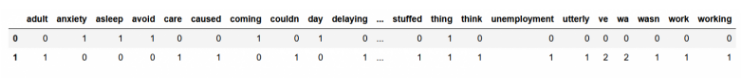

In [69]:
count_vectorizer = CountVectorizer()

In [70]:
# получим значения
bag_words_values = count_vectorizer.fit_transform(data['Text_lemming'].to_numpy())

In [71]:
# получим токены
bag_words_tokens = count_vectorizer.get_feature_names_out()

In [72]:
data_bag_words = pd.DataFrame(data = bag_words_values.toarray(), columns = bag_words_tokens)

In [73]:
data_bag_words.head(1)

,аа,ааа,аааа,ааааа,аааааа,аааааааа,аааха,аам,аарон,аахен,...,ящерица,ящеричный,ящерка,ящик,ящиков,ящичек,ящичный,ящур,яющий,яя
0,1,4,0,0,0,0,0,0,0,0,...,0,0,0,17,0,0,0,0,0,0


In [74]:
data_bag_words['Tag'] = data['Tag']

**Самые популярные слова во всех книгах**

In [75]:
most_popular_words = pd.DataFrame(data_bag_words.drop(columns='Tag').sum()).reset_index()

In [76]:
most_popular_words = most_popular_words.rename(columns={'index': 'word', 0: 'count'})

In [77]:
most_popular_words = most_popular_words.sort_values('count', ascending=False)

<AxesSubplot:xlabel='word', ylabel='count'>

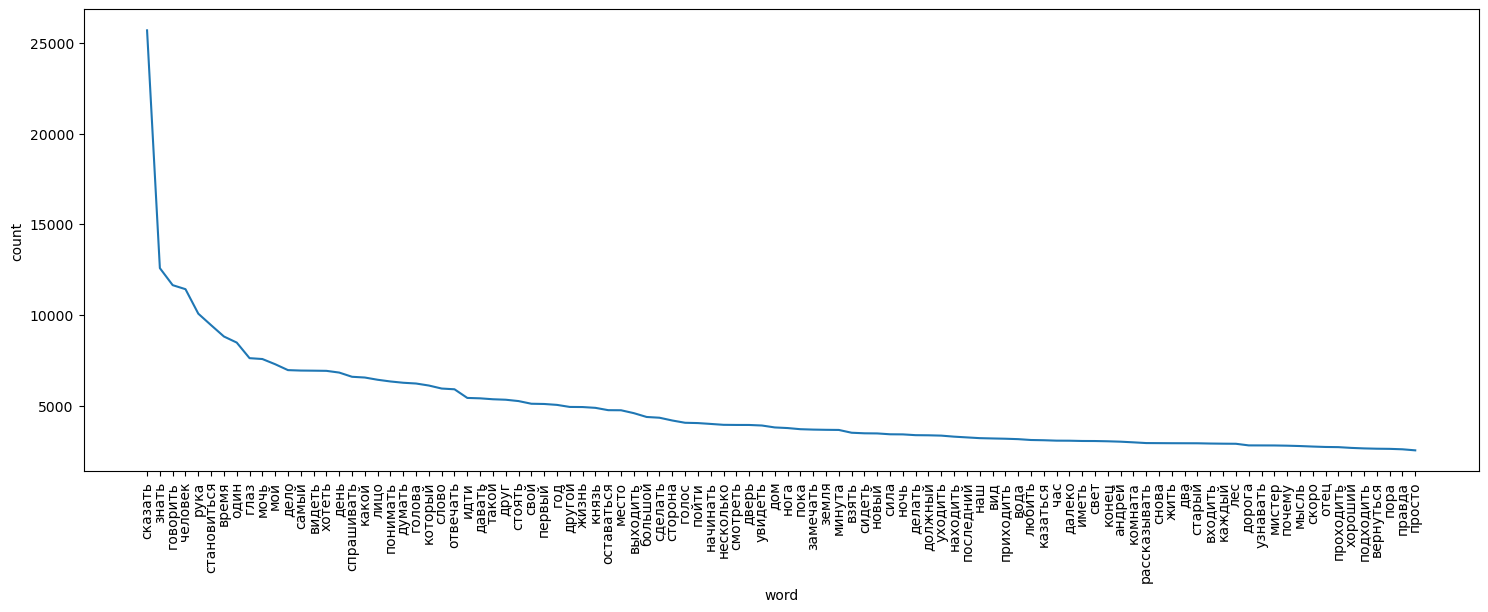

In [78]:
figure(figsize=(18, 6), dpi=100)
plt.xticks(rotation=90)

sns.lineplot(data=most_popular_words.head(100), x="word", y='count')

In [79]:
print(russian_stopwords)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [80]:
# x_train_bag_words, x_test_bag_words, y_train_bag_words, y_test_bag_words = \
#     train_test_split(bag_words_values.toarray(), data_bag_words['Tag'], test_size = 0.2, random_state = 10)

**TF-IDF**

В тексте большого объема некоторые слова могут присутствовать очень часто, но при этом не нести никакой значимой информации о фактическом содержании текста (документа). Если такие данные передавать непосредственно классификатору, то такие частые термины могут затенять частоты более редких, но при этом более интересных терминов. Для того, чтобы этого избежать, достаточно разделить количество употреблений каждого слова в документе на общее количество слов в документе, это есть TF — частота термина. Термин IDF (inverse document frequency) обозначает обратную частоту термина (инверсия частоты) с которой некоторое слово встречается в документах. IDF позволяет измерить непосредственную важность термина.

https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a

https://www.dmitrymakarov.ru/intro/topic-identification-19/#8-metod-tf-idf

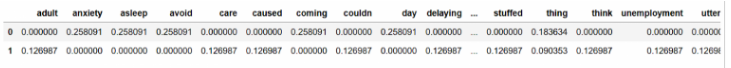
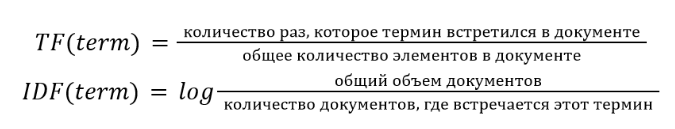

In [81]:
# создадим объект класса TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(analyzer='word')

In [82]:
# получим значения
tfidf_values = tfidf_vectorizer.fit_transform(data['Text_lemming'].to_numpy())

In [83]:
# получим токены
tfidf_tokens = tfidf_vectorizer.get_feature_names_out()

In [84]:
data_TFIDF = pd.DataFrame(data = tfidf_values.toarray(), columns = tfidf_tokens)

In [85]:
data_TFIDF.head(1)

,аа,ааа,аааа,ааааа,аааааа,аааааааа,аааха,аам,аарон,аахен,...,ящерица,ящеричный,ящерка,ящик,ящиков,ящичек,ящичный,ящур,яющий,яя
0,0.000348,0.001288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.002195,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
data_TFIDF['Tag'] = data['Tag']

In [87]:
# x_train_TFIDF, x_test_TFIDF, y_train_TFIDF, y_test_TFIDF = \
#     train_test_split(tfidf_values.toarray(), data_TFIDF['Tag'], test_size = 0.2, random_state = 10)

**word2vec**

https://builtin.com/machine-learning/nlp-word2vec-python

https://www.kaggle.com/code/reiinakano/basic-nlp-bag-of-words-tf-idf-word2vec-lstm/notebook

In [88]:
# токенизация текста для word2vec
data['Text_lemming'] = data.apply(lambda x: word_tokenize(x.Text_lemming, language = "russian"), axis=1)
w2v = Word2Vec(data['Text_lemming'].to_numpy(), min_count=1, vector_size = 5)
words = list(w2v.wv.index_to_key)
X = w2v.wv[w2v.wv.index_to_key]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

pca_df = pd.DataFrame(result, columns = ['x','y'])

#add the words for the hover effect
pca_df['word'] = words
pca_df.head()

,x,y,word
0,6.722838,-1.827754,сказать
1,6.830944,-4.398108,знать
2,6.806484,-3.131916,говорить
3,6.167228,-2.764221,человек
4,6.401916,4.369732,рука


In [89]:
# w2v.wv['ящерица'].reshape((1, 5))

In [90]:
# # КРАСИВЫЙ ГРАФИК НЕ УДАЛЯТЬ, ТЯЖЁЛЫЙ

# # облако слов в word2vec

# fig = go.Figure(data=go.Scattergl(
#    x = pca_df['x'],
#    y = pca_df['y'],
#    mode='markers',
#    marker=dict(
#        color=np.random.randn(1000000),
#        colorscale='Viridis',
#        line_width=1
#    ),
#    text=pca_df['word'],
#    textposition="bottom center"
# ))

# fig.show()

In [91]:
#######################

In [92]:
def get_word2vec(sentences, location):
    """Returns trained word2vec
    
    Args:
        sentences: iterator for sentences
        
        location (str): Path to save/load word2vec
    """
    if os.path.exists(location):
        print('Found {}'.format(location))
        model = gensim.models.Word2Vec.load(location)
        
        return model
    
    print('{} not found. training model'.format(location))
    model = gensim.models.Word2Vec(sentences, vector_size=1000000, window=5, min_count=1, workers=4)
    print('Model done training. Saving to disk')
    model.save(location)
    
    return model

In [93]:
# получили word2vec модель
w2vec = get_word2vec(data['Text_lemming'].values, 'w2vmodel')

Found w2vmodel


In [94]:
class MyTokenizer:
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        transformed_X = []
        for document in X:
            tokenized_doc = []
            for sent in nltk.sent_tokenize(document):
                tokenized_doc += nltk.word_tokenize(sent)
            transformed_X.append(np.array(tokenized_doc))
            
        return np.array(transformed_X)
    
    def fit_transform(self, X, y=None):
        return self.transform(X)

In [95]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec.wv.vectors[0])

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = MyTokenizer().fit_transform(X)
        
        return np.array([
            np.mean([self.word2vec.wv[w] for w in words if w in self.word2vec.wv]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])
    
    def fit_transform(self, X, y=None):
        return self.transform(X)

In [96]:
mean_embedding_vectorizer = MeanEmbeddingVectorizer(w2vec)

In [97]:
data['Text_lemming']  = data.apply(lambda x: re.sub("[^а-яА-Я]"," ", str(x.Text_lemming)), axis=1)

In [98]:
data_w2v = mean_embedding_vectorizer.fit_transform(data['Text_lemming'])

In [99]:
# на каждую книжку свой вектор
data_w2v

array([[-0.24142124,  0.36132833,  0.05865642, ..., -0.59690976,
         0.24531595, -0.14608902],
       [-0.23725532,  0.19169194,  0.10187268, ..., -0.5903245 ,
         0.14617684, -0.17831407],
       [-0.25105456,  0.29065934,  0.07373933, ..., -0.59783304,
         0.18412456, -0.1674786 ],
       ...,
       [-0.2576041 ,  0.26807037,  0.09176932, ..., -0.60032606,
         0.15801701, -0.18417282],
       [-0.25090048,  0.26697296,  0.08838473, ..., -0.5888474 ,
         0.16098289, -0.17785895],
       [-0.2499942 ,  0.30853862,  0.07403792, ..., -0.6080254 ,
         0.20462345, -0.16321534]], dtype=float32)

In [100]:
# x_train_w2v, x_test_w2v, y_train_w2v, y_test_w2v = \
#     train_test_split(mean_embedded, data['Tag'], test_size = 0.2, random_state = 10)

**BERT**

https://data.iori.ranepa.ru/nlp/bert_vectorizer.html

**USE**

## Обучение моделей на основе собственной векторизации

In [101]:
samples = [
    [data_bag_words.drop(columns=['Tag']), data_bag_words['Tag'], 'bag_words'], # мешок слов
    [data_TFIDF.drop(columns=['Tag']), data_TFIDF['Tag'], 'TFIDF'], # TFIDF
    [data_w2v, data['Tag'], 'word2vec']
]

In [102]:
data_results = pd.DataFrame(columns=['Method_train', 'Method_vectorize', 'Log loss', 'Accuracy', 'Recall', 'F1-score', 'Time_add'])

In [103]:
def evaluate_features(clf, method_train):
    
    data_results_temp = pd.DataFrame(columns=['Method_train', 'Method_vectorize', 'Log loss', 'Accuracy', 'Recall', 'F1-score', 'Time_add'])
    
    for X, y, method_vec in samples:
        
        probas = cross_val_predict(clf, 
                                   X, y, 
                                   cv=StratifiedKFold(n_splits=5), 
                                   n_jobs=-1, 
                                   method='predict_proba', 
                                   verbose=2)

        pred_indices = np.argmax(probas, axis=1)
        classes = np.unique(y)
        preds = classes[pred_indices]

        precision, recall, f1score = precision_recall_fscore_support(y, preds, average='macro')[:3]
        
        to_add = {'Method_vectorize': method_vec,
                  'Method_train': method_train,
                  'Log loss': log_loss(y, probas),
                  'Accuracy': precision,
                  'Recall': recall,
                  'F1-score': f1score,
                  'Time_add': datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")}

        data_results_temp = data_results_temp.append(to_add, ignore_index=True)
        
    return data_results_temp

### Наивный классификатор Байеса

In [104]:
result = evaluate_features(GaussianNB(), 'Наивный классификатор Байеса')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


In [105]:
data_results = pd.concat([data_results, result])

In [106]:
result

,Method_train,Method_vectorize,Log loss,Accuracy,Recall,F1-score,Time_add
0,Наивный классификатор Байеса,bag_words,22.386244,0.265770,0.278648,0.264106,2023-02-04 13:12:08
1,Наивный классификатор Байеса,TFIDF,24.305065,0.219780,0.241685,0.221011,2023-02-04 13:12:11
2,Наивный классификатор Байеса,word2vec,18.906541,0.321542,0.347686,0.324036,2023-02-04 13:12:11


### Логистическая регрессия

Вроде только для бинарной классификации...

In [107]:
result = evaluate_features(LogisticRegression(), 'Логистическая регрессия')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   24.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [108]:
data_results = pd.concat([data_results, result])

In [109]:
result

,Method_train,Method_vectorize,Log loss,Accuracy,Recall,F1-score,Time_add
0,Логистическая регрессия,bag_words,4.051366,0.432540,0.375987,0.385245,2023-02-04 13:12:36
1,Логистическая регрессия,TFIDF,2.282064,0.266440,0.255411,0.210390,2023-02-04 13:12:41
2,Логистическая регрессия,word2vec,2.297323,0.160237,0.210567,0.173155,2023-02-04 13:12:41


In [110]:
# for x_train, x_test, y_train, y_test, method_vec in samples:
    
#     logreg = LogisticRegression()
#     logreg.fit(x_train, y_train)
    
#     to_add = {'Method_vectorize': method_vec,
#               'Method_train': 'Лог. регрессия',
#               'Accuracy': logreg.score(x_test, y_test),
#               'Time_add': datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")}
    
#     data_results = data_results.append(to_add, ignore_index=True)

### Метод опорных векторов

In [111]:
result = evaluate_features(svm.SVC(probability=True), 'Метод опорных векторов')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [112]:
data_results = pd.concat([data_results, result])

In [113]:
result

,Method_train,Method_vectorize,Log loss,Accuracy,Recall,F1-score,Time_add
0,Метод опорных векторов,bag_words,2.443281,0.056548,0.133866,0.068329,2023-02-04 13:12:44
1,Метод опорных векторов,TFIDF,2.514470,0.031429,0.120879,0.049887,2023-02-04 13:12:46
2,Метод опорных векторов,word2vec,2.393737,0.068681,0.143856,0.092936,2023-02-04 13:12:46


In [114]:
# for x_train, x_test, y_train, y_test, method_vec in samples:
    
#     metodsvm = svm.SVC()
#     metodsvm.fit(x_train, y_train)
    
#     to_add = {'Method_vectorize': method_vec,
#               'Method_train': 'Метод опорных векторов',
#               'Accuracy': metodsvm.score(x_test, y_test),
#               'Time_add': datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")}
    
#     data_results = data_results.append(to_add, ignore_index=True)

### Адаптивный бустинг

In [ ]:
result = evaluate_features(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), 
                                              n_estimators=200, random_state=42), 
                           'Адаптивный бустинг')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   51.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


In [ ]:
data_results = pd.concat([data_results, result])

In [ ]:
result

In [ ]:
# for x_train, x_test, y_train, y_test, method_vec in samples:
    
#     model_сlf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4), n_estimators=200, random_state=42)
#     model_сlf.fit(x_train, y_train)
    
#     to_add = {'Method_vectorize': method_vec,
#               'Method_train': 'Адаптивный бустинг',
#               'Accuracy': model_сlf.score(x_test, y_test),
#               'Time_add': datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")}
    
#     data_results = data_results.append(to_add, ignore_index=True)

### Градиентный бустинг

In [ ]:
result = evaluate_features(GradientBoostingClassifier(max_depth=3, n_estimators=200, 
                                                      random_state=12, learning_rate=1), 
                           'Градиентный бустинг')

In [ ]:
data_results = pd.concat([data_results, result])

In [ ]:
result

In [ ]:
# for x_train, x_test, y_train, y_test, method_vec in samples:
    
#     model_сlf = GradientBoostingClassifier(max_depth=3, n_estimators=200, random_state=12, learning_rate=1)
#     model_сlf.fit(x_train, y_train)
    
#     to_add = {'Method_vectorize': method_vec,
#               'Method_train': 'Градиентный бустинг',
#               'Accuracy': model_сlf.score(x_test, y_test),
#               'Time_add': datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")}
    
#     data_results = data_results.append(to_add, ignore_index=True)

### Дальше бога нет - только нейронки и жаба

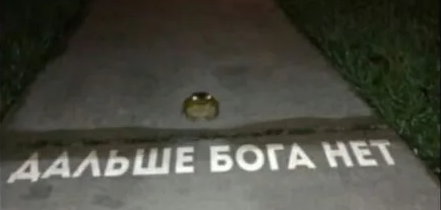

## Обучение моделей на основе внешний предобученных моделей

### BERT русскоязычная малая

https://habr.com/ru/post/567028/

https://habr.com/ru/post/436878/

https://github.com/shitkov/bert4classification/blob/main/bert4clssification.ipynb

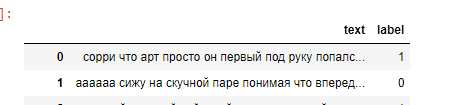

In [ ]:
# # wget.download('https://raw.githubusercontent.com/shitkov/bert4classification/main/train.csv')
# # wget.download('https://raw.githubusercontent.com/shitkov/bert4classification/main/valid.csv')
# # wget.download('https://raw.githubusercontent.com/shitkov/bert4classification/main/test.csv')
# wget.download('https://raw.githubusercontent.com/shitkov/bert4classification/main/bert_classifier.py')
# wget.download('https://raw.githubusercontent.com/shitkov/bert4classification/main/bert_dataset.py')
# wget.download('https://raw.githubusercontent.com/shitkov/bert4classification/main/requirements.txt')

In [ ]:
x_train, x_test, y_train, y_test = \
    train_test_split(data.drop(columns='Tag'), data['Tag'], test_size = 0.2, random_state = 10)

In [ ]:
x_train, x_val, y_train, y_val = \
    train_test_split(x_train, y_train, test_size = 0.2, random_state = 10)

In [ ]:
classifier = BertClassifier(
        model_path='cointegrated/rubert-tiny',
        tokenizer_path='cointegrated/rubert-tiny',
        n_classes=7,
        epochs=2,
        model_save_path='/content/bert.pt'
)

In [ ]:
data['Text_lemming']

In [ ]:
list(x_train['Text_lemming'])

In [ ]:
classifier.preparation(
        X_train=x_train,
        y_train=y_train,
        X_valid=x_val,
        y_valid=y_val
    )

In [ ]:
classifier.train()

In [ ]:
texts = list(x_test['Text'])
labels = list(y_test)

predictions = [classifier.predict(t) for t in texts]

In [ ]:
precision, recall, f1score = precision_recall_fscore_support(labels, predictions, average='macro')[:3]

print(f'precision: {precision}, recall: {recall}, f1score: {f1score}')

## Анализ результатов

In [ ]:
data_results